<a href="https://colab.research.google.com/github/RoyalCoderPRO/MyCS50projects/blob/main/StudentScoresMLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Multiple Linear Regression on Synthetic Data about student scores dependent on lifestyle choice and academic factors

## Installation and Importation

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install IPYthon

Importing multiple linear regression libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

Downloading Data from google drive

In [ ]:
!gdown 129fiHZThp0NHa2bGHCqm4SEjQp1MvAiM

Downloading...
From: https://drive.google.com/uc?id=129fiHZThp0NHa2bGHCqm4SEjQp1MvAiM
To: /content/work_and_marks.csv
100% 217k/217k [00:00<00:00, 91.7MB/s]


# The Database

## Work and Marks

### Description:

The Work and Marks Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

### Variable

- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.
- Siblings: Count of Siblings
- Parents Divorced/Seperated: If the parents of the student have been seperated

In [ ]:
df = pd.read_csv('/content/work_and_marks.csv')
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Siblings,Parents Divorced/Seperated,Performance Index
7870,6,62,Yes,5,0,0,Yes,46
4001,5,47,Yes,8,7,0,No,34
4590,2,86,Yes,6,2,0,No,65
1735,1,96,Yes,7,9,0,No,71
1557,6,49,Yes,7,5,4,No,37


Data Description

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Siblings,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,0.679600,55.224800
std,2.589309,17.343152,1.695863,2.867348,1.261706,19.212558
min,1.000000,40.000000,4.000000,0.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,0.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,0.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,1.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,4.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Siblings                          10000 non-null  int64 
 6   Parents Divorced/Seperated        10000 non-null  object
 7   Performance Index                 10000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 625.1+ KB


*Since Data is pre-cleaned, it does not contain null values*

---



In [ ]:
df.rename(columns = {'Sample Question Papers Practiced':'Practiced','Extracurricular Activities':'Extra_curr','Parents Divorced/Seperated':'Divorced'}, inplace = True)

Making Long Column names shorter

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Extra_curr','Divorced'], drop_first=True)


X = df_encoded.drop('Performance Index', axis=1)
sc = StandardScaler()

y = df_encoded['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Encoding Yes and No Values to 1 and 0
And splitting data into training and testing sets of 70/30 ratio

# Assumptions

### Linearity
Linear regression needs the relationship between the independent and dependent variables to be linear.
Hence, we shall use a pairplot

### Visualization of Data

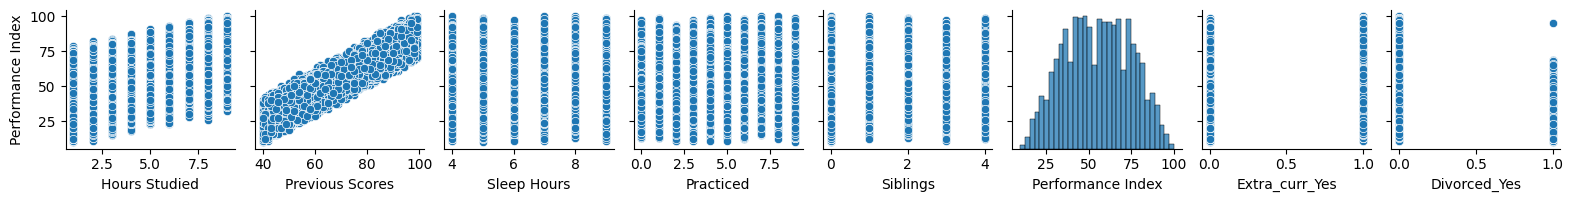

In [ ]:
sns.pairplot(df_encoded, height=2, y_vars='Performance Index')

### Interpreting the Pairplot

1.   Performance Index (Dependent Variable) appears to normally distributed
2.   Only Previous Scores and Hours studied appears to have any good correlation with Performance Index

* Independent Variables
  *   Previous Scores: Appears to have strong correlation as well as low variance
  *   Hours Studied: Despite having a linear relationship with Peformance Index, it appears to have high variance and may not be very potent for prediction
  *   Divorced: Appears to have negative correlation with Performance Index
  *   Every other Variable is not correlated with Performance Index and also does not have any transformed collinearity
  

* Multilinearity: Independent Variables appear to have little to no correlation


### Multicollinearity
To Check for multicollinearity, we recheck for correlation between independent variables

In [ ]:
df_encoded.drop(columns='Performance Index').corr()

,Hours Studied,Previous Scores,Sleep Hours,Practiced,Siblings,Extra_curr_Yes,Divorced_Yes
Hours Studied,1.000000,-0.012390,0.001245,0.017463,-0.011227,0.003873,-0.151936
Previous Scores,-0.012390,1.000000,0.005944,0.007888,-0.004077,0.008369,-0.380093
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.000002,-0.023284,-0.027500
Practiced,0.017463,0.007888,0.003990,1.000000,0.006217,0.013103,-0.021646
Siblings,-0.011227,-0.004077,0.000002,0.006217,1.000000,-0.005495,0.007513
Extra_curr_Yes,0.003873,0.008369,-0.023284,0.013103,-0.005495,1.000000,0.008198
Divorced_Yes,-0.151936,-0.380093,-0.027500,-0.021646,0.007513,0.008198,1.000000


Since none of the correlations are more than 0.8, the multicollinearity assumption has been tested and validated

> Therefore, we have trained a model to predict academic performances

### Fitting Model to continue testing of assumptions

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

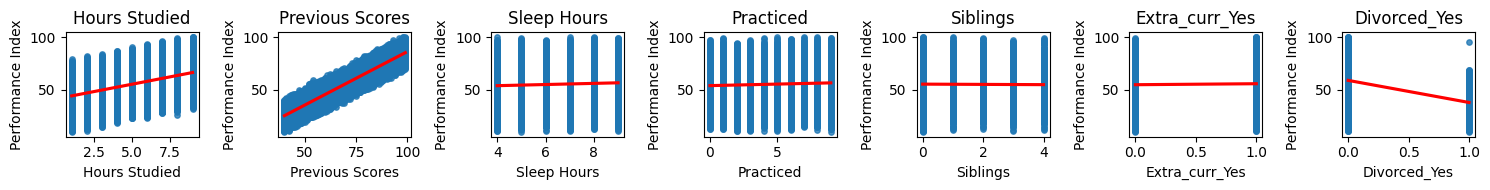

In [ ]:
features = X.columns

plt.figure(figsize=(15, 2))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 7, i)
    sns.regplot(x=feature, y='Performance Index', data=df_encoded, scatter_kws={'s':15}, line_kws={'color':'red'})
    plt.title(f'{feature}')
    plt.tight_layout()

plt.show()

### Mean of Residuals

In [ ]:
residuals = y_test.values - y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.09835132961649234


Mean of Residuals is really low, which shows that the estimate does not have any skewing, i.e. the model negligbly underestimates Perfomance index

In [ ]:
# Calculate the numerator and denominator for the Durbin-Watson statistic
numerator = np.sum(np.diff(residuals) ** 2)
denominator = np.sum(residuals ** 2)

# Calculate the Durbin-Watson statistic
durbin_watson = numerator / denominator

print("Durbin-Watson statistic:", durbin_watson)

Durbin-Watson statistic: 2.0390210799976556


Since Durbin-Watson Statistic is ≈ 2, therefore, there is no autocorrelation

## Homoscedasticity check
It's to check if the variance is equal or almost equal across the regression line

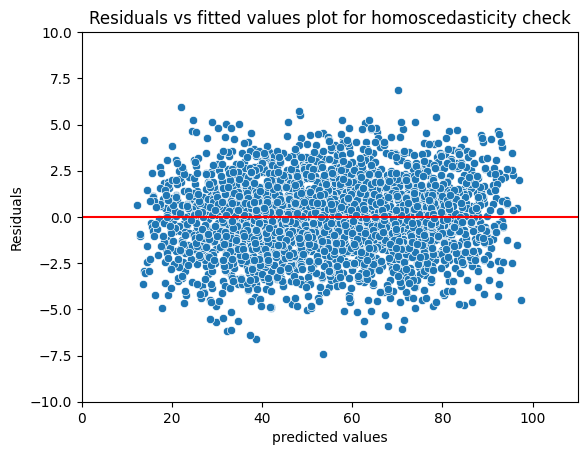

In [ ]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,110)
p = sns.lineplot(x=[0,110],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

## Goldfeld Quandt Test
Checking heteroscedasticity :
Using Goldfeld Quandt we test for heteroscedasticity.

* **Null Hypothesis:** Error terms are homoscedastic
* **Alternative Hypothesis:** Error terms are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.9595067162254076), ('p-value', 0.787691074612775)]

Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic

## Check for Normality

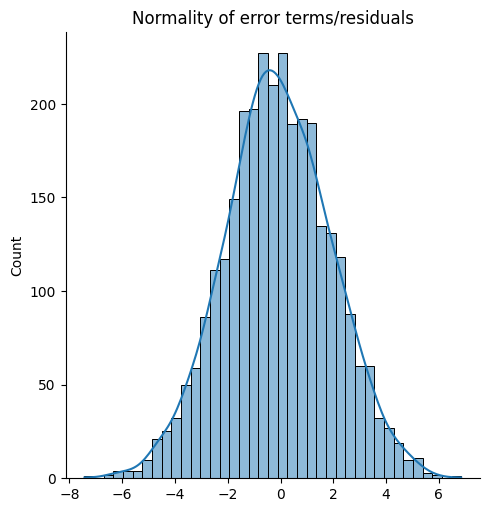

In [ ]:
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are appear highly normal

## Evaluate Our Model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

score = r2_score(y_test, y_pred)
adj_r_2 = 1 - ( 1-score ) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1 )

print('R2 Score: '+ str(r2_score(y_test, y_pred)))
print('Adjusted R2 Score: ' + str(adj_r_2))
print('RSS Score: '+ str(np.sum((y_test - y_pred)**2)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Median Absolute Error: ' + str(median_absolute_error(y_test,y_pred)))
print('Mean Squared Error ' + str(mean_squared_error(y_test,y_pred)))



R2 Score: 0.9890120822414481
Adjusted R2 Score: 0.9889863752146065
RSS Score: 12198.557380591068
Mean Absolute Error: 1.608345779035327
Median Absolute Error: 1.3469827710270614
Mean Squared Error 4.066185793530356


1.  **Since Adjusted R2 Score is ≅ 1, model performs well on r2 score test**
2.  **RSS Score is a relative value which will be used to compare values**
3.  **Mean Absolute Error is reasonably close to zero and positive, potentially implying negligible underestimation of response variable**
4.  **Median is reasonably close to zero and positive, potentially implying negligible underestimation of response variable with regard to variance as well**
5.  **Mean Squared Error is reasonably close to zero, showing high precision of prediction**

## Refining the Model
* We will remove outliers to prevent rotation of regression line
* To make the model more reliable as well as efficient, we shall drop the columns with low correlation to independent variable

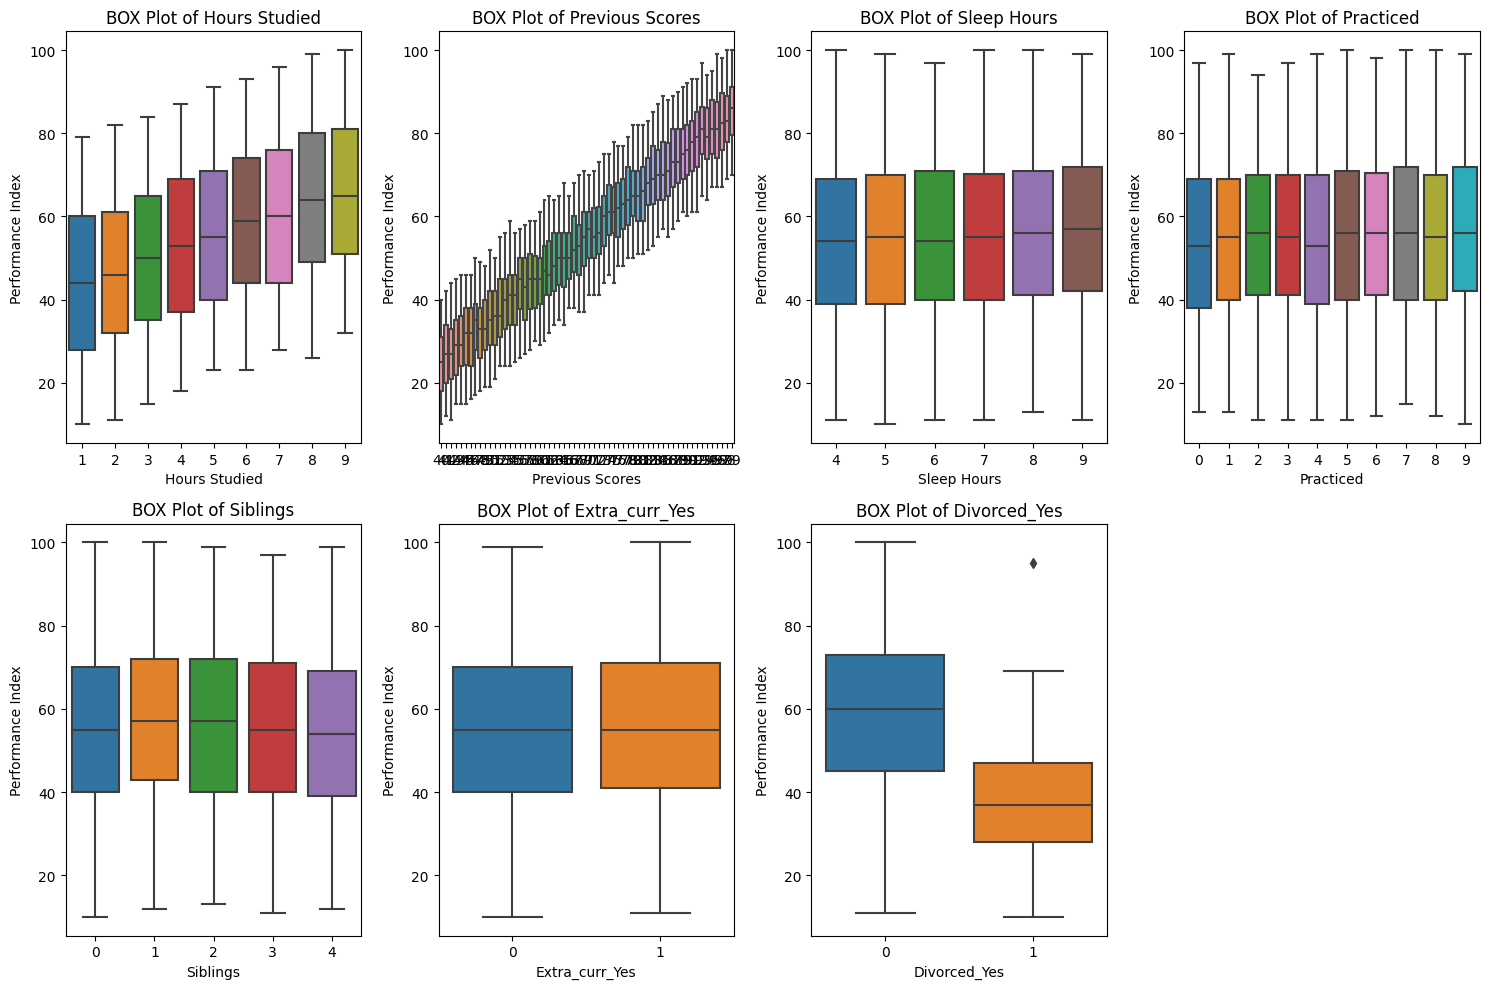

In [ ]:
features = X.columns

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=feature, y='Performance Index', data=df_encoded)
    plt.title(f'BOX Plot of {feature}')
    plt.tight_layout()

plt.show()

### Interpreting the BoxPlot
> The Boxplot shows no outliers in the data (i.e. No datapoints more than Q3 or less than Q1), hence we will not be dropping any data

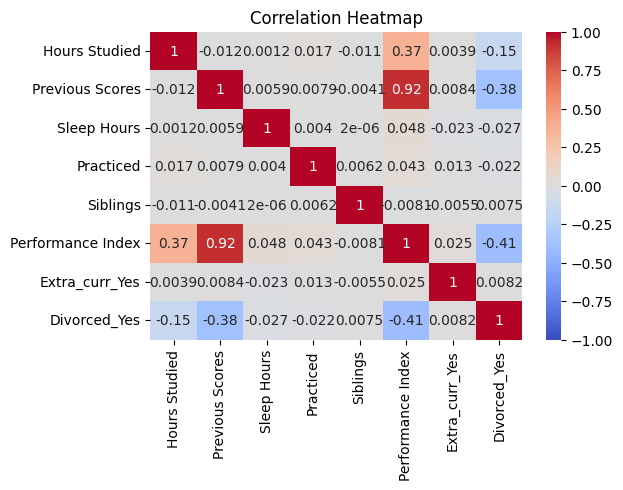

In [ ]:
corr = df_encoded.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Interpreting the Correlation Heatmap
> Only Previous Score appears to have high and reasonable correlation with Performance Index

In [ ]:
irrelevant = ['Sleep Hours','Practiced','Extra_curr_Yes','Siblings']
X_revised = X_train.drop(columns=irrelevant)

> *Dropping low correlation variables*

In [ ]:
lr_revised = LinearRegression()
lr_revised.fit(X_revised, y_train)
y_pred_revised = lr_revised.predict(X_test.drop(columns=irrelevant))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error



score_rev = r2_score(y_test, y_pred_revised)
print('R2 Score: '+ str(r2_score(y_test, y_pred_revised)))
adj_r_2_rev = 1 - ( 1-score_rev ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print('Ajusted R2 Score: '+str(adj_r_2_rev))
print('RSS Score: '+ str(np.sum((y_test - y_pred_revised)**2)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred_revised)))
print('Median Absolute Error: ' + str(median_absolute_error(y_test, y_pred_revised)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred_revised)))

R2 Score: 0.9859373220356624
Ajusted R2 Score: 0.9859044213853447
RSS Score: 15612.092103550012
Mean Absolute Error: 1.8126355582193827
Median Absolute Error: 1.5047517826027672
Mean Squared Error: 5.2040307011833375


In [ ]:
print(adj_r_2)
print(adj_r_2_rev)

0.9889863752146065
0.9859044213853447


In [ ]:
print('R2 Score: '+ str(a:=r2_score(y_test, y_pred)))
print('R2 Score revised: '+ str(b:=r2_score(y_test, y_pred_revised)))
print('Revised more?: '+str(b>a))
print('Ajusted R2 Score: '+str(a:=adj_r_2))
print('Ajusted R2 Score revised: '+str(b:=adj_r_2_rev))
print('Revised more?: '+str(b>a))
print('RSS Score: '+ str(a:=np.sum((y_test - y_pred)**2)))
print('RSS Score revised: '+ str(b:=np.sum((y_test - y_pred_revised)**2)))
print('Revised more?: '+str(b>a))
print('Mean Absolute Error: ' + str(a:=mean_absolute_error(y_test, y_pred)))
print('Mean Absolute Error revised: ' + str(b:=mean_absolute_error(y_test, y_pred_revised)))
print('Revised more?: '+str(b>a))
print('Median Absolute Error: ' + str(a:=median_absolute_error(y_test, y_pred)))
print('Median Absolute Error revised: ' + str(b:=median_absolute_error(y_test, y_pred_revised)))
print('Revised more?: '+str(b>a))
print('Mean Squared Error: ' + str(a:=mean_squared_error(y_test,y_pred)))
print('Mean Squared Error revised: ' + str(b:=mean_squared_error(y_test,y_pred_revised)))
print('Revised more?: '+str(b>a))

R2 Score: 0.9890120822414481
R2 Score revised: 0.9859373220356624
Revised more?: False
Ajusted R2 Score: 0.9889863752146065
Ajusted R2 Score revised: 0.9859044213853447
Revised more?: False
RSS Score: 12198.557380591068
RSS Score revised: 15612.092103550012
Revised more?: True
Mean Absolute Error: 1.608345779035327
Mean Absolute Error revised: 1.8126355582193827
Revised more?: True
Median Absolute Error: 1.3469827710270614
Median Absolute Error revised: 1.5047517826027672
Revised more?: True
Mean Squared Error: 4.066185793530356
Mean Squared Error revised: 5.2040307011833375
Revised more?: True


### In all metrics, the revised model is worse than the original model
> We move on to removing logically explainable columns only

### Removing Logically irrelevant column
> 'Sibling' since the other columns appear to have logical correlation to prediction

In [ ]:
lr_revised_2 = LinearRegression()
lr_revised_2.fit(X_train.drop(columns=['Siblings']), y_train)
y_pred_revised_2 = lr_revised_2.predict(X_test.drop(columns=['Siblings']))

In [ ]:
score_2_rev = r2_score(y_test, y_pred_revised_2)
adj_r_2_rev = 1 - ( 1-score_2_rev ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print('R2 score_2: '+ str(r2_score(y_test, y_pred_revised_2)))
print('Adjusted R2 score_2: '+str(adj_r_2_rev))
print('RSS score_2: '+ str(np.sum((y_test - y_pred_revised_2)**2)))
print('Mean Absolute Error_2: ' + str(mean_absolute_error(y_test, y_pred_revised_2)))
print('Median Absolute Error_2: ' + str(median_absolute_error(y_test, y_pred_revised_2)))
print('Mean Squared Error_2: ' + str(mean_squared_error(y_test,y_pred_revised_2)))

R2 score_2: 0.9890177598570039
Adjusted R2 score_2: 0.9889920661133539
RSS score_2: 12192.25421008463
Mean Absolute Error_2: 1.6081028901831553
Median Absolute Error_2: 1.34962275782366
Mean Squared Error_2: 4.064084736694877


In [ ]:
print('R2 Score: '+ str(a:=r2_score(y_test, y_pred)))
print('R2 Score revised_2: '+ str(b:=r2_score(y_test, y_pred_revised_2)))
print('revised_2 more?: '+str(b>a))
print('Ajusted R2 Score: '+str(a:=adj_r_2))
print('Ajusted R2 Score revised_2: '+str(b:=adj_r_2_rev))
print('revised_2 more?: '+str(b>a))
print('RSS Score: '+ str(a:=np.sum((y_test - y_pred)**2)))
print('RSS Score revised_2: '+ str(b:=np.sum((y_test - y_pred_revised_2)**2)))
print('revised_2 more?: '+str(b>a))
print('Mean Absolute Error: ' + str(a:=mean_absolute_error(y_test, y_pred)))
print('Mean Absolute Error revised_2: ' + str(b:=mean_absolute_error(y_test, y_pred_revised_2)))
print('revised_2 more?: '+str(b>a))
print('Median Absolute Error: ' + str(a:=median_absolute_error(y_test, y_pred)))
print('Median Absolute Error revised_2: ' + str(b:=median_absolute_error(y_test, y_pred_revised_2)))
print('revised_2 more?: '+str(b>a))
print('Mean Squared Error: ' + str(a:=mean_squared_error(y_test,y_pred)))
print('Mean Squared Error revised_2: ' + str(b:=mean_squared_error(y_test,y_pred_revised_2)))
print('revised_2 more?: '+str(b>a))

R2 Score: 0.9890120822414481
R2 Score revised_2: 0.9890177598570039
revised_2 more?: True
Ajusted R2 Score: 0.9889863752146065
Ajusted R2 Score revised_2: 0.9889920661133539
revised_2 more?: True
RSS Score: 12198.557380591068
RSS Score revised_2: 12192.25421008463
revised_2 more?: False
Mean Absolute Error: 1.608345779035327
Mean Absolute Error revised_2: 1.6081028901831553
revised_2 more?: False
Median Absolute Error: 1.3469827710270614
Median Absolute Error revised_2: 1.34962275782366
revised_2 more?: True
Mean Squared Error: 4.066185793530356
Mean Squared Error revised_2: 4.064084736694877
revised_2 more?: False


### In all Metrics other than median absolute error, dropping Siblings appears to have made the model better
> Therefore, most optimum model (under speculation) has been achieved

# **Hence, the final values of our model are:**

In [ ]:
from IPython.display import HTML

# Define your coefficients and their corresponding descriptions
coefficients = {
    'R2 Score': str(r2_score(y_test, y_pred_revised_2)),
    'Adjusted R2 Score': str(a:=adj_r_2),
    'Mean Absolute Error': str(b:=mean_absolute_error(y_test, y_pred_revised_2)),
    'Median Absolute Error':str(b:=median_absolute_error(y_test, y_pred_revised_2)),
    'Mean Squared Error':str(b:=mean_squared_error(y_test,y_pred_revised_2))
}

# Generate HTML to display the coefficients in tiny squares
html = '<div style="display: flex; flex-wrap: wrap;">'
for coeff, description in coefficients.items():
    html += f'<div style="border: 2px solid black; padding: 20px; margin: 5px; font-size: 20px;">'
    html += f'<div style="font-weight: bold;">{coeff}</div>'
    html += f'<div style="color: #00ff80;">{description}</div>'
    html += '</div>'
html += '</div>'

# Display the HTML
HTML(html)


### Look at the predictions of random samples
Run the Next Cell to see predictions with a random sample

In [ ]:
model = lr_revised_2
now = df_encoded.sample(1)
Y_test_now = now['Performance Index']
X_test_now = now.drop(columns=['Performance Index','Siblings'])
Performance_of_sample = model.predict(X_test_now.sample(1))
predicted_value = str(Performance_of_sample).strip('[').strip(']')
true_value = str(Y_test_now).split()[1]
html = '<div style="display: flex; flex-wrap: wrap;">'

for i in [predicted_value, true_value]:
  html += f'<div style="border: 3px solid grey; padding: 10px; margin: 5px; font-size: 20px;">'
  if i==predicted_value:
    html += f'<div style="font-weight: bold;">Predicted Value</div>'
  else:
    html += f'<div style="font-weight: bold;">True Value</div>'
  html += f'<div style="color:orange;">{i}</div>'
  html += '</div>'
html+='</div>'

display(X_test_now, HTML(html))

,Hours Studied,Previous Scores,Sleep Hours,Practiced,Extra_curr_Yes,Divorced_Yes
4120,2,75,4,9,0,0


### **You can try it yourself, put in your own input values to see your predicted performance**

In [ ]:
Your_val = dict()
def func(i):
  try:
    if 'Yes' in i:
       return int(input(f'Enter {i} with 1 for Yes and 0 for No: '))
    else:
      return float(input(f'Enter {i} here: '))
  except ValueError:
      print('Please enter Numeric values only')
      return func(i)
for i in df_encoded.drop(columns=['Performance Index']).columns:
  Your_val[i] = func(i)

Enter Hours Studied here: 4
Enter Previous Scores here: 91.8
Enter Sleep Hours here: 8
Enter Practiced here: 6
Enter Siblings here: 1
Enter Extra_curr_Yes with 1 for Yes and 0 for No: 1
Enter Divorced_Yes with 1 for Yes and 0 for No: 0


### **Run next cell to find out your predicted score**

In [ ]:
your_pd = pd.DataFrame(Your_val, index=[0])
your_y = round(float((model.predict(your_pd.drop(columns=['Siblings'])))))
HTML(f'<div style="font-weight: bold; font-size: 25px;">Predicted Performance Score: </div> <div style="font-size: 32px; color: yellow;">{your_y}</div>')

---